<a href="https://colab.research.google.com/github/pradeepodela/googleplaystore-reviews-extractor/blob/main/googleappreviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install google-play-scraper

     |████████████████████████████████| 52 kB 1.1 MB/s 
  Created wheel for google-play-scraper: filename=google_play_scraper-1.0.3-py3-none-any.whl size=24394 sha256=f59d2d7a83bd9bd0eacb957195520249e4bb68c0e3615fda2f9d01d63b5cc3d1
  Stored in directory: /root/.cache/pip/wheels/81/37/0b/4a14be55b449a048cd93d79930b1a980dee7896480defa1923
Successfully built google-play-scraper


In [26]:
from google_play_scraper import app
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google_play_scraper import Sort, reviews_all

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [105]:
!cd sample_data

In [106]:
%ls

drive/  sample_data/


In [7]:
us_reviews = reviews_all(
    'fit.cure.android',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    country='In', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [9]:
df_busu = pd.DataFrame(np.array(us_reviews),columns=['review'])
df = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOEXoIVWzigA18LCuwdWVcII8VQ733lPoRA-LaV...,shriram raman,https://play-lh.googleusercontent.com/a/AATXAJ...,Love the intensity and the structure of their ...,5,0,9.26,2022-01-19 15:51:53,Thank you very much for your 5-star review!!!,2022-01-19 16:04:05
1,gp:AOqpTOHaprkJKalVSoyvIQuTB5nG5fSe751igwW4WDp...,shashank shekhar,https://play-lh.googleusercontent.com/a-/AOh14...,The experience for consulting dietician was wo...,5,0,9.26,2022-01-19 15:25:13,Thank you for your encouraging words.,2022-01-19 15:26:50
2,gp:AOqpTOGrCnZPDfcM1y5jtLvSDSRXyCUBvh9wmncIBBT...,Sachin Sharma,https://play-lh.googleusercontent.com/a-/AOh14...,It was a pleasure to work with my dietician! S...,5,0,None,2022-01-19 12:05:39,"Dear User, thank you very much for sharing you...",2022-01-19 12:00:58
3,gp:AOqpTOH59h79JZ4MlghEEkzNz8Rh_u9qhH8oi7p8WBX...,Rajendra Kumar,https://play-lh.googleusercontent.com/a-/AOh14...,Rajendar kumar,4,0,None,2022-01-19 09:48:31,None,NaT
4,gp:AOqpTOEUTC3UROBlcpX5bVqMCdd86PXrHjpOO3-3NGb...,Shubh Upadhyay,https://play-lh.googleusercontent.com/a-/AOh14...,Do not believe in their advertising..these guy...,1,0,None,2022-01-19 07:52:56,"Dear User,\nWe apologize for the issue. Could ...",2022-01-19 07:57:32


In [51]:
print('**************************')
print('Total unique value counts')
print(df.score.value_counts())
print('**************************')
print('shape of the data frame = ' , df.shape)
print('**************************')

**************************
Total unique value counts
5    18234
1     3545
4     2487
3      872
2      699
Name: score, dtype: int64
**************************
shape of the data frame =  (25837, 10)
**************************


In [92]:
grouped = df.groupby(df.score)
five_star = grouped.get_group(5)
four_star = grouped.get_group(4)
three_star = grouped.get_group(3)
two_star = grouped.get_group(2)
one_star = grouped.get_group(1)

In [108]:
# saving the dataframe
df.to_csv('/content/drive/MyDrive/reviewsdata/cult_fit_reviews.csv')
one_star.to_csv('/content/drive/MyDrive/reviewsdata/cultfit_1star_reviews.csv')
two_star.to_csv('/content/drive/MyDrive/reviewsdata/cultfit_2star_reviews.csv')
three_star.to_csv('/content/drive/MyDrive/reviewsdata/cultfit_3star_reviews.csv')
four_star.to_csv('/content/drive/MyDrive/reviewsdata/cultfit_4star_reviews.csv')
five_star.to_csv('/content/drive/MyDrive/reviewsdata/cultfit_5star_reviews.csv')

In [80]:
print(five_star.shape)
five_star.head()

(18234, 10)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOEXoIVWzigA18LCuwdWVcII8VQ733lPoRA-LaV...,shriram raman,https://play-lh.googleusercontent.com/a/AATXAJ...,Love the intensity and the structure of their ...,5,0,9.26,2022-01-19 15:51:53,Thank you very much for your 5-star review!!!,2022-01-19 16:04:05
1,gp:AOqpTOHaprkJKalVSoyvIQuTB5nG5fSe751igwW4WDp...,shashank shekhar,https://play-lh.googleusercontent.com/a-/AOh14...,The experience for consulting dietician was wo...,5,0,9.26,2022-01-19 15:25:13,Thank you for your encouraging words.,2022-01-19 15:26:50
2,gp:AOqpTOGrCnZPDfcM1y5jtLvSDSRXyCUBvh9wmncIBBT...,Sachin Sharma,https://play-lh.googleusercontent.com/a-/AOh14...,It was a pleasure to work with my dietician! S...,5,0,None,2022-01-19 12:05:39,"Dear User, thank you very much for sharing you...",2022-01-19 12:00:58
8,gp:AOqpTOEPGPgUyc7Atbo1RbG0kNUAgmK2zDKiW0CkkzT...,VISWESWAR REDDY,https://play-lh.googleusercontent.com/a/AATXAJ...,"With a lot of variety of workout regimes, cult...",5,0,8.90,2022-01-18 04:23:01,"Thank you for a detailed review bud, we apprec...",2022-01-18 04:31:48
9,gp:AOqpTOFFAP992Fvyf9FJ87dDCAvCgPO_dzfiDth-r1K...,Rohan Chhatre,https://play-lh.googleusercontent.com/a-/AOh14...,fantastic app. great workouts. fabulous trainers!,5,0,9.26,2022-01-18 03:03:34,It is delightful to hear such positive words a...,2022-01-18 03:09:53


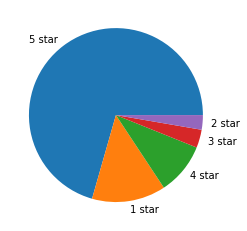

In [90]:
y = np.array([18234, 3545, 2487, 872,699])
mylabels = ['5 star','1 star','4 star','3 star','2 star']
plt.pie(y,labels = mylabels)
plt.show() 